In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

In [3]:
df1 = pd.read_csv('steps.csv', sep=';') #open the first file met the amount of steps
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = pd.read_csv('survey.csv') #open the second file
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [5]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [6]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [7]:
df['weight'].value_counts() #Get all the values out of the row weight

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
101.0     1
20.0      1
700.0     1
37.0      1
6.0       1
Name: weight, Length: 72, dtype: int64

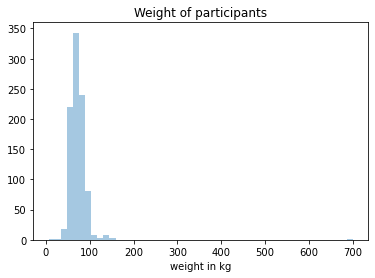

In [8]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the weighting column. I need to drop the NA's for the plot
plt.title('Weight of participants')
plt.xlabel('weight in kg')
plt.show()

In [11]:
#To remove the values above 200 we need to create a function that we then apply to the entire column
def above_200(x):
    if(x > 200): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200)



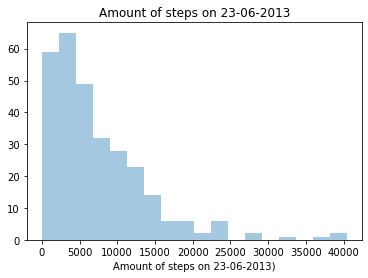

In [13]:
#calculating and ploting the amount of steps on 23-6-2013

df['23-6-2013'].name = 'Amount of steps on 23-06-2013' #Labeling the variable for plotting
amount_of_steps = df['23-6-2013'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(amount_of_steps, kde=False) 
plt.title('Amount of steps on 23-06-2013') #Add a title to the histogram
plt.show()

In [15]:
#Calculate mean, median and var and add this value to the new created column mean, skip NaN values
df1["mean"] = df1.mean(axis = 1, skipna = True)
df1["median"] = df1.median(axis = 1, skipna = True)
df1["var"] = df1.var(axis = 1, skipna = True) 
df1["standard"] = df1.std(axis=1)

df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,median,var,standard
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,199334.267454,9870.0,5.275839e+12,4.046383e+11
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95421.202540,5375.0,1.173041e+12,9.050208e+10
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,6227.0,4567.0,2567.0,1129.0,NaN,169149.607716,8255.0,3.409723e+12,2.756598e+11
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,486206.043743,3290.0,4.109438e+12,8.218876e+11
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296969.410684,5058.0,3.974576e+12,5.174458e+11


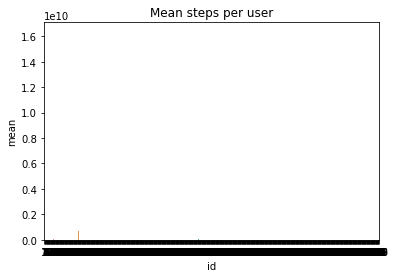

In [22]:
df1 = df1.sort_values(by="mean",ascending=False)
ax = sns.barplot(x=df1["id"],y=df1["mean"])
plt.title('Mean steps per user')
plt.show()


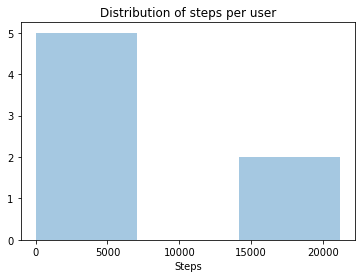

In [23]:
#Then i need to remove all the above 25000
def above_5(x):
    if(x > 25000): 
        return float('NaN')
    else: 
        return x
df1['mean'] = df1['mean'].apply(above_5)

df1['mean'].name = 'Steps' 
file_size = df1['mean'].dropna()
sns.distplot(file_size, kde=False) 
plt.title('Distribution of steps per user')
plt.show()

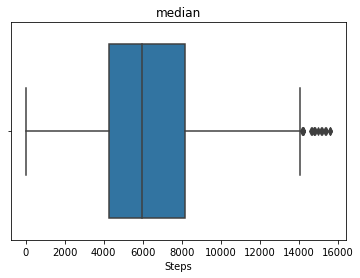

In [24]:
#It's time to Boxplot the median
df1['median'] = df1['median'].apply(above_5)
sns.boxplot(df1['median'])
plt.title('median')
plt.xlabel('Steps')
plt.show()


Discription

The data contains some outliers. It can be seen that there are people who take more than 15,000 steps per day. You can see that there is a lot of variation. The outliers can mainly be seen in the box plot. A number of which fall outside the box

